In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv('data/losses.csv')

In [4]:
data.head(20)

,Date,Losses
0,2022-02-25,2800.0
1,2022-02-26,1500.0
2,2022-02-27,200.0
3,2022-02-28,800.0
4,2022-03-01,410.0
5,2022-03-02,130.0
6,2022-03-03,3160.0
7,2022-03-04,166.0
8,2022-03-05,834.0
9,2022-03-06,1000.0


<Axes: >

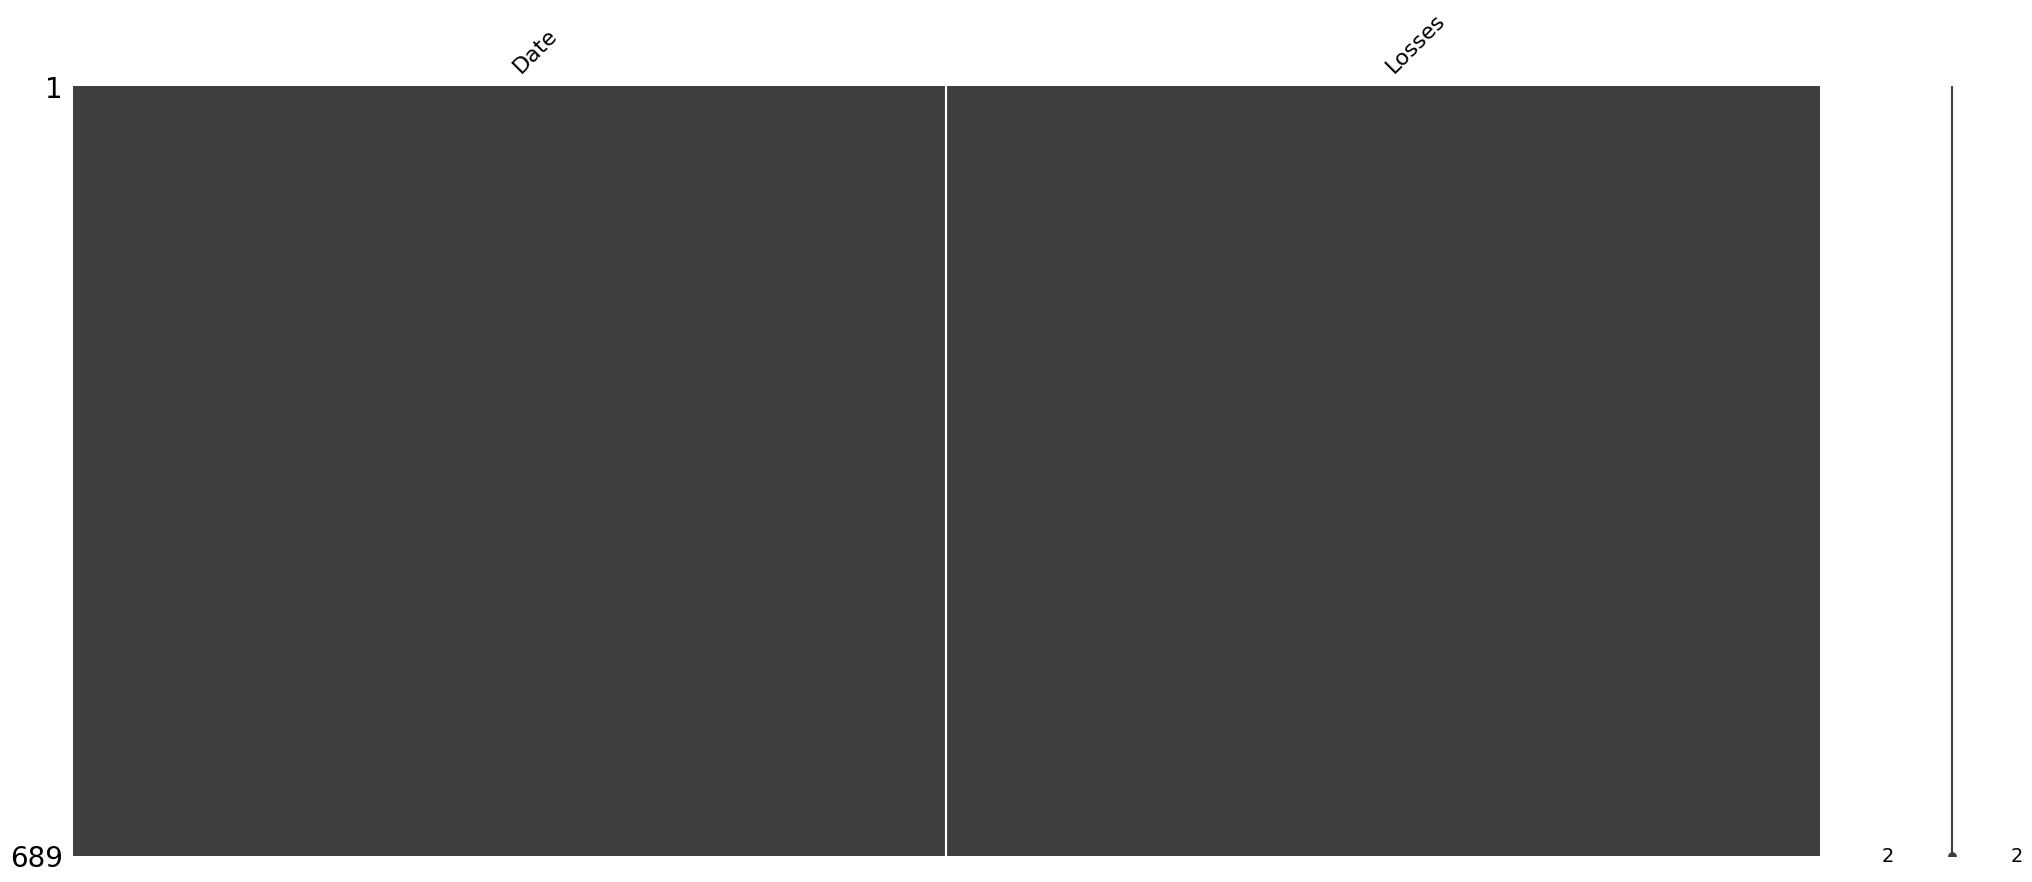

In [5]:
import missingno
missingno.matrix(data)

In [6]:
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [7]:
data

,Losses
Date,
2022-02-25,2800.0
2022-02-26,1500.0
2022-02-27,200.0
2022-02-28,800.0
2022-03-01,410.0
...,...
2024-01-10,800.0
2024-01-11,830.0
2024-01-12,840.0


In [8]:
from vizual.vizual_lib import VizualLib

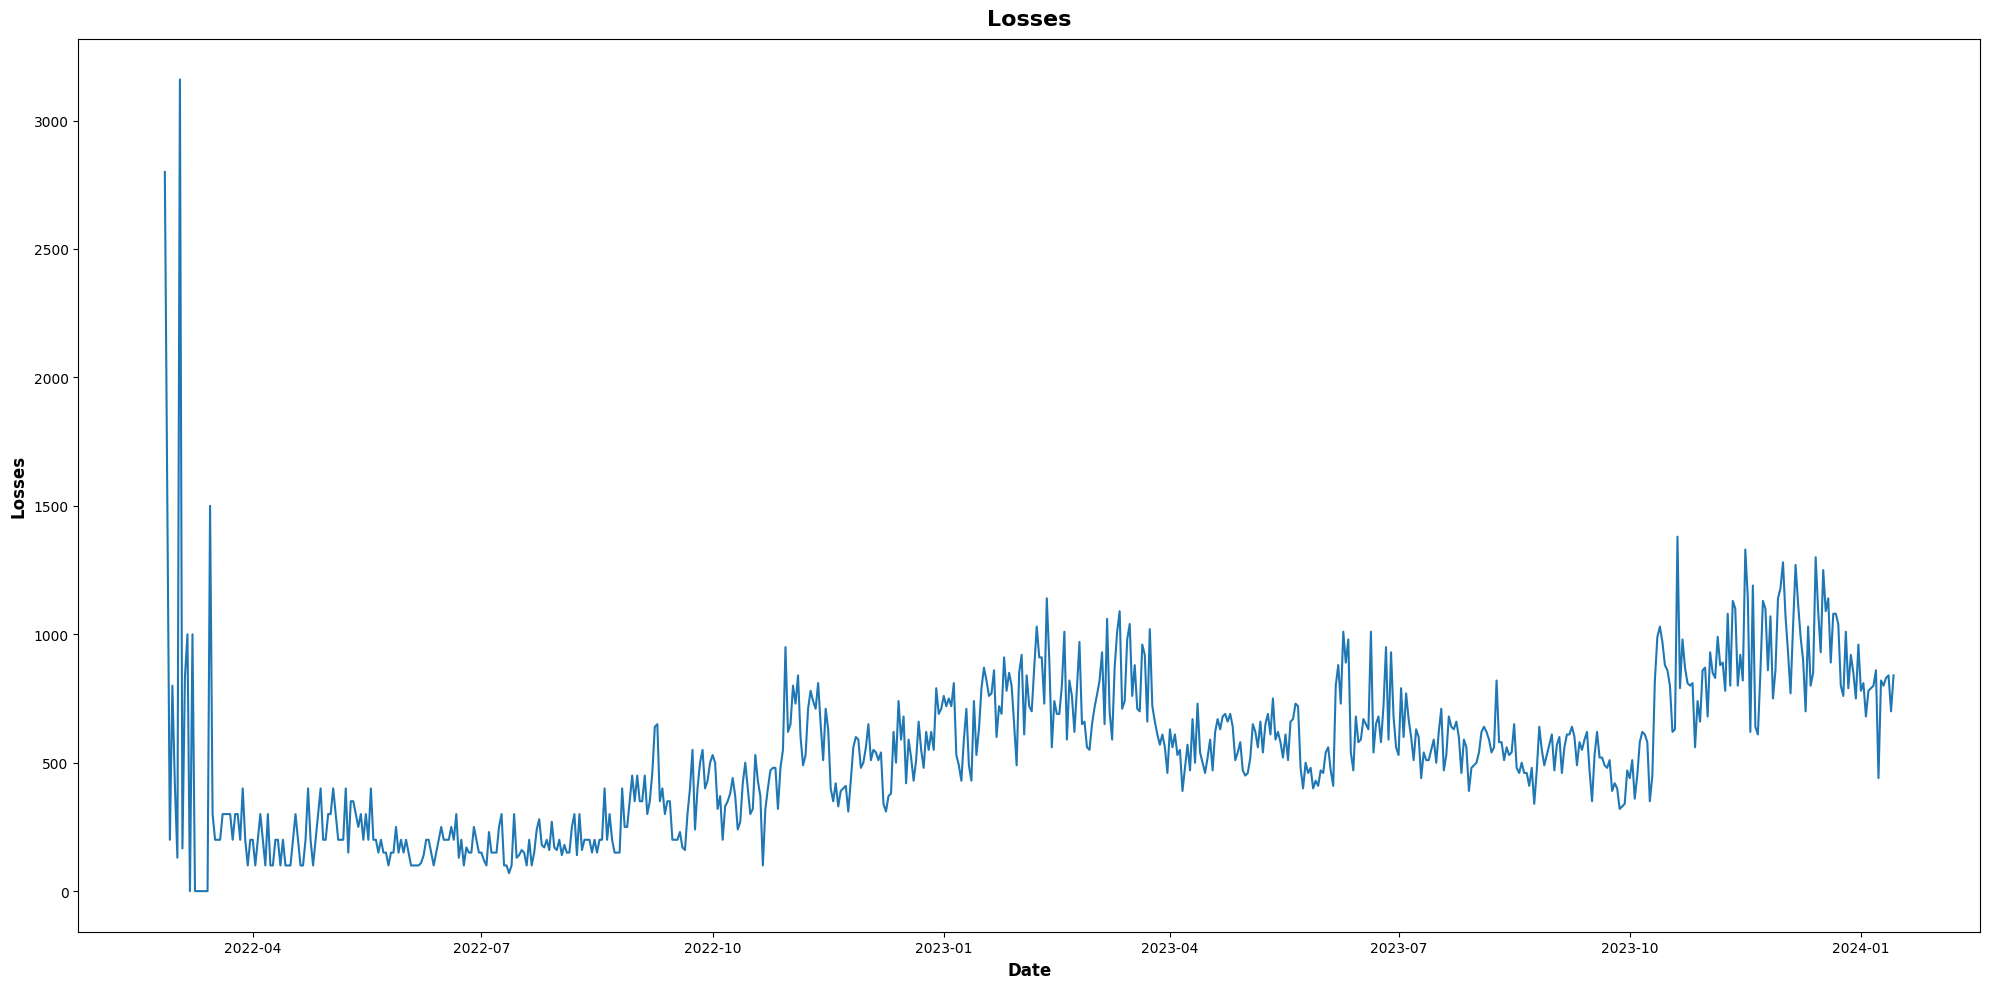

In [9]:
VizualLib.figure(data)

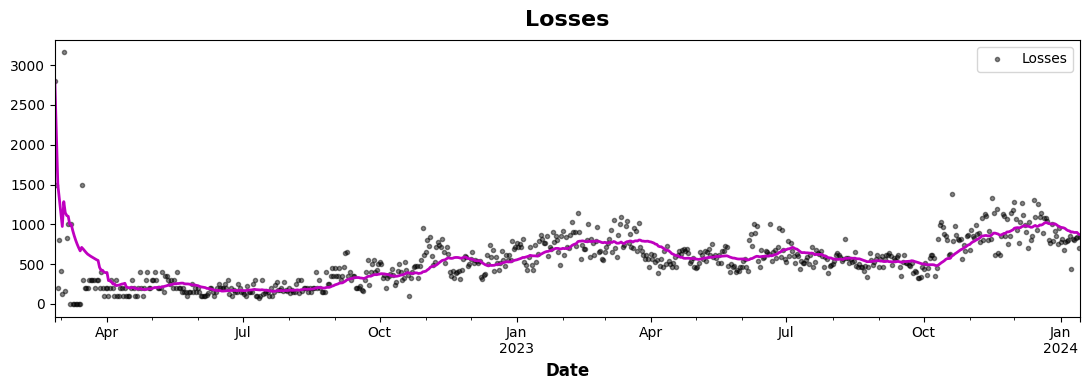

In [10]:
VizualLib.moving_average(data, rolling=30, min_periods=1, color='#00000078')

findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.
findfont: Font family 'Helvetica' not found.


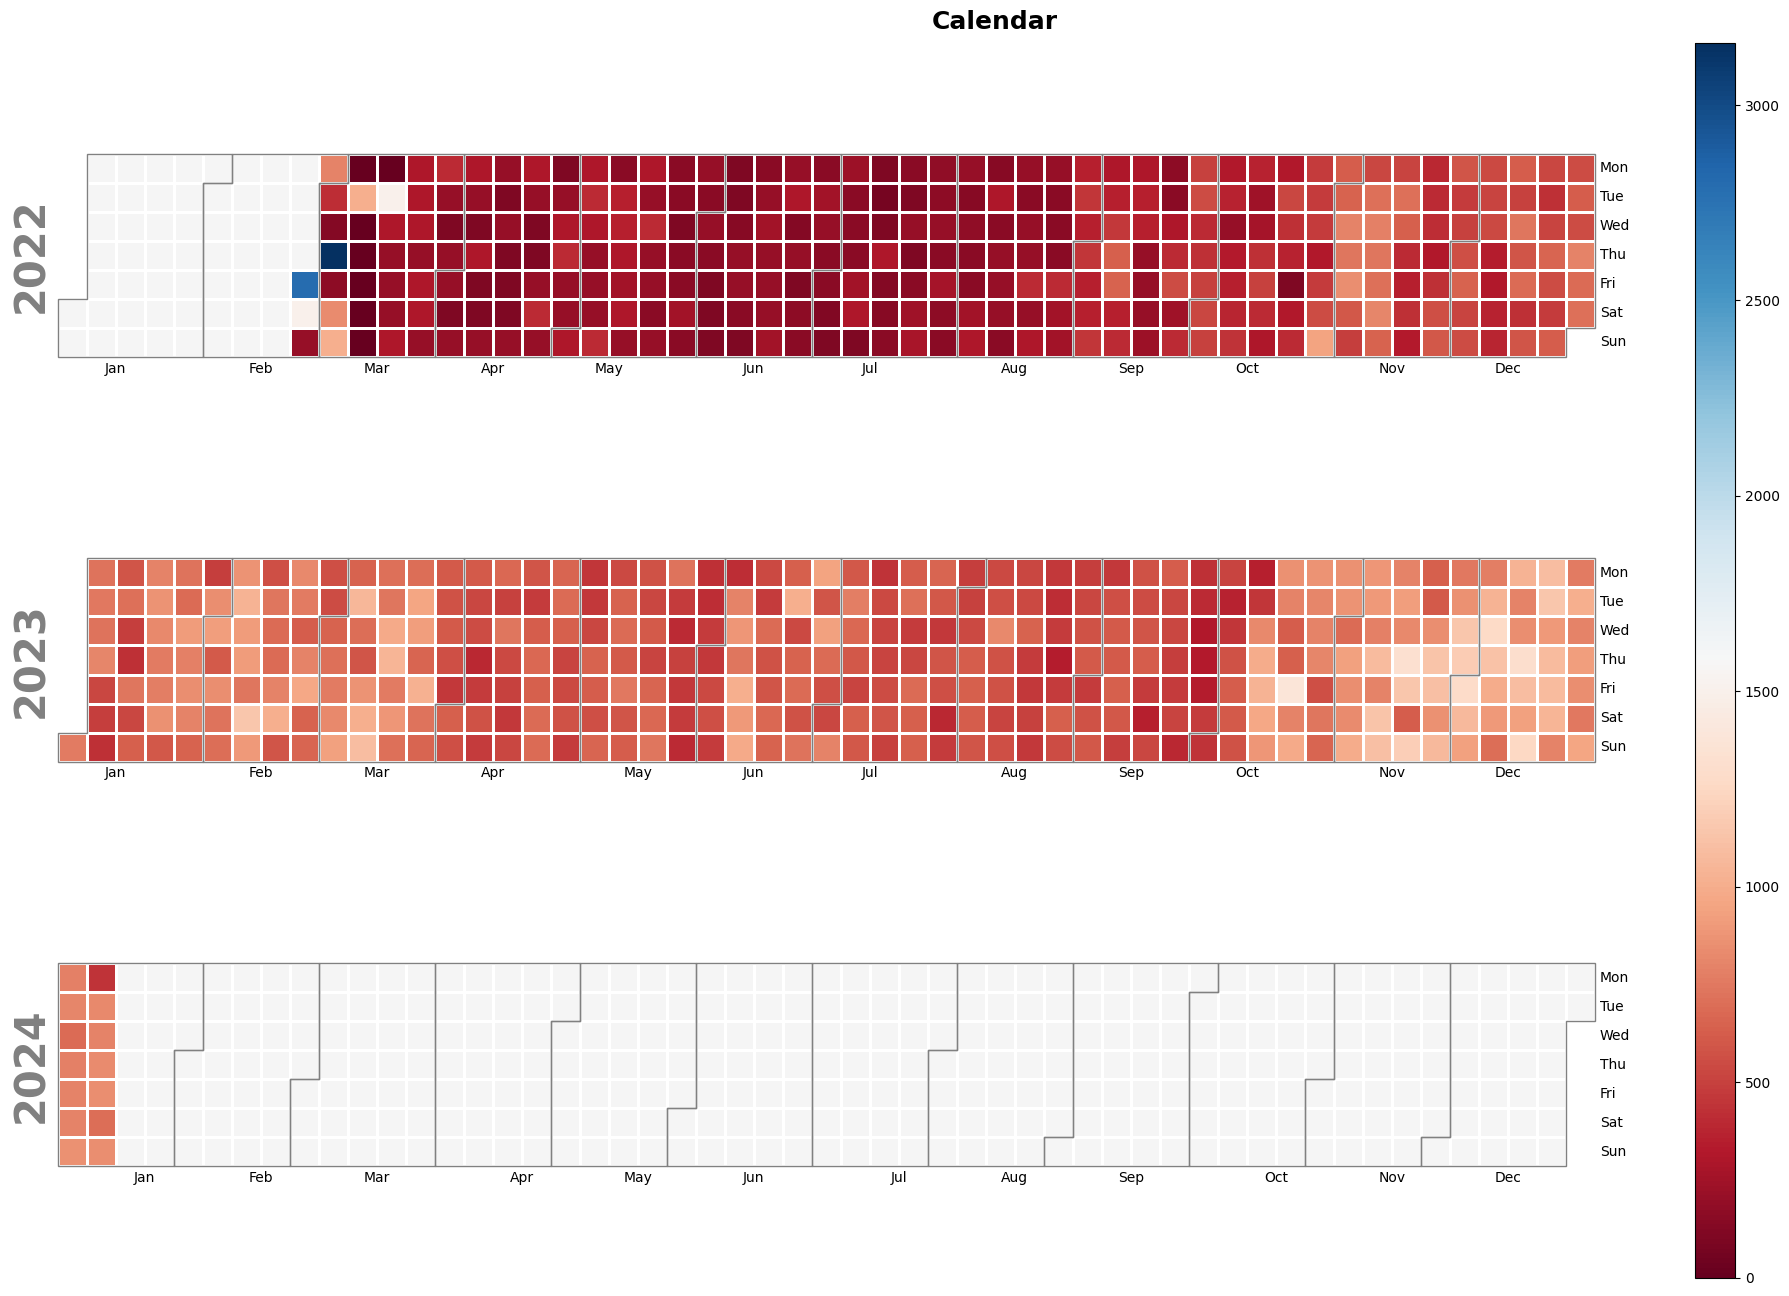

In [11]:
VizualLib.show_calendar(data['Losses'], data.index)

array([[<Axes: title={'center': 'Losses'}>]], dtype=object)

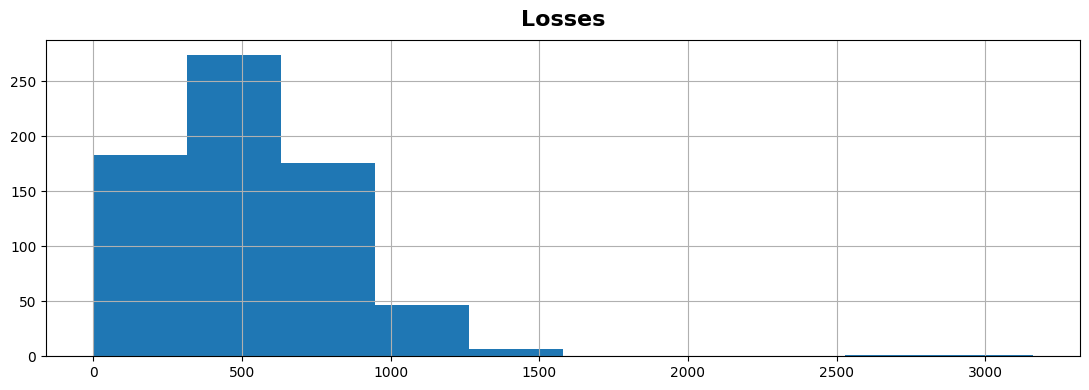

In [12]:
data.hist()

<Axes: title={'center': 'Periodogram'}, ylabel='Variance'>

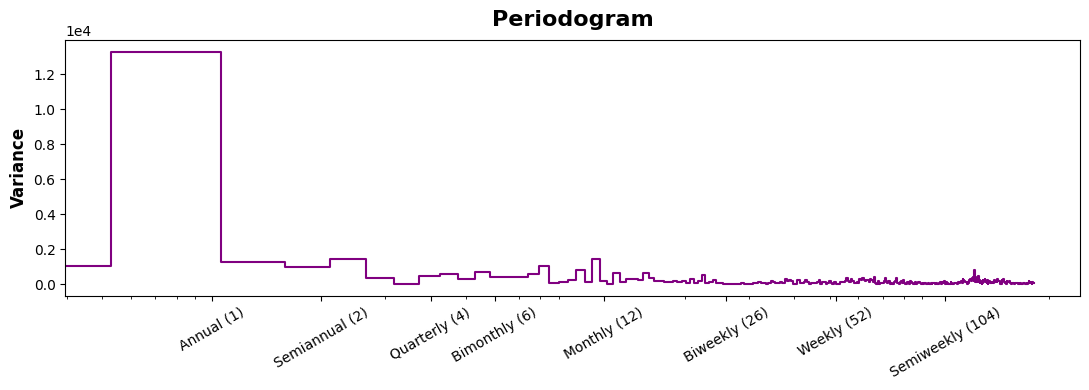

In [13]:
VizualLib.plot_periodogram(data.Losses)

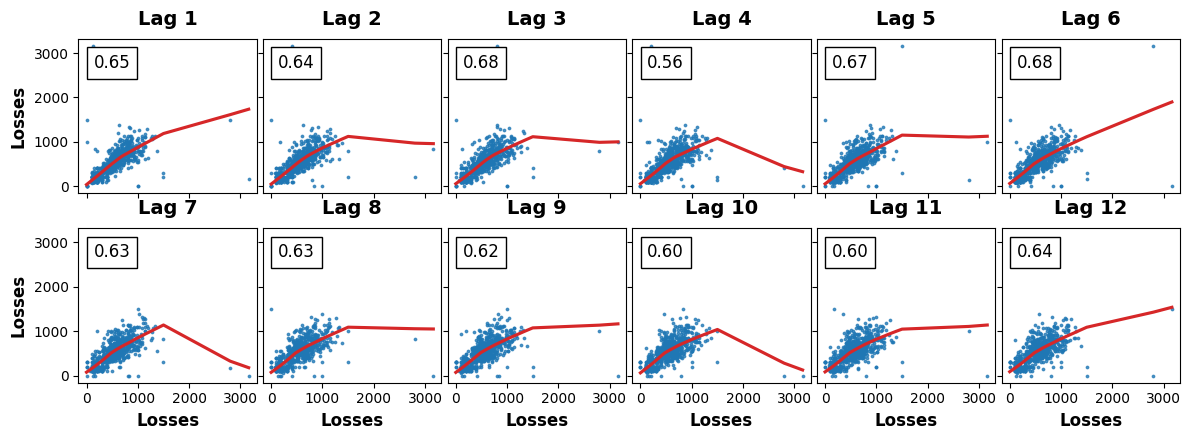

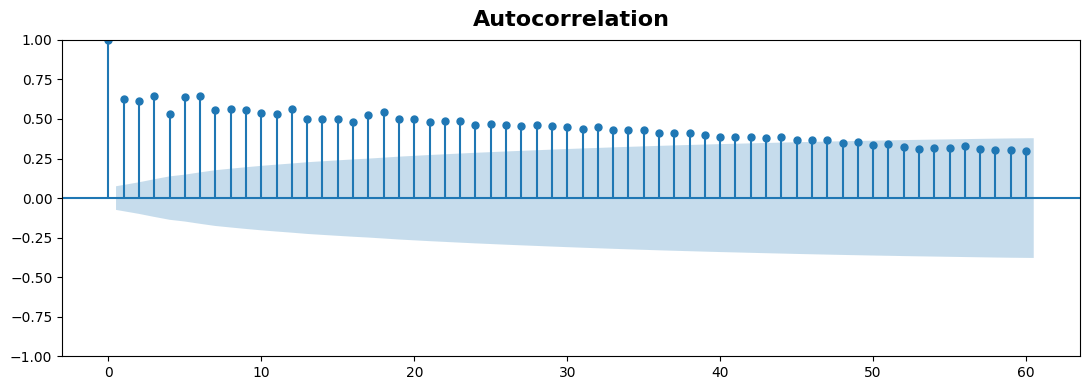

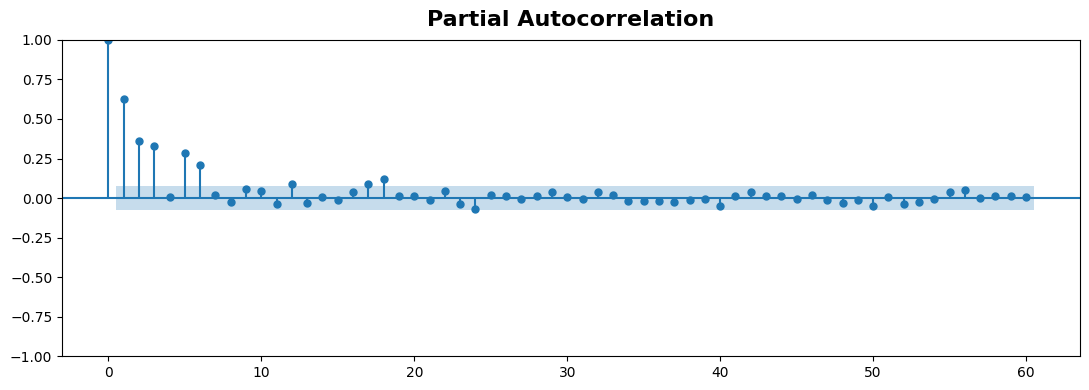

In [20]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
import matplotlib.pyplot as plt
VizualLib.plot_lags(data['Losses'], lags=12, nrows=2)
plot_acf(data['Losses'], lags=60)
plot_pacf(data['Losses'], lags=60)
plt.tight_layout()

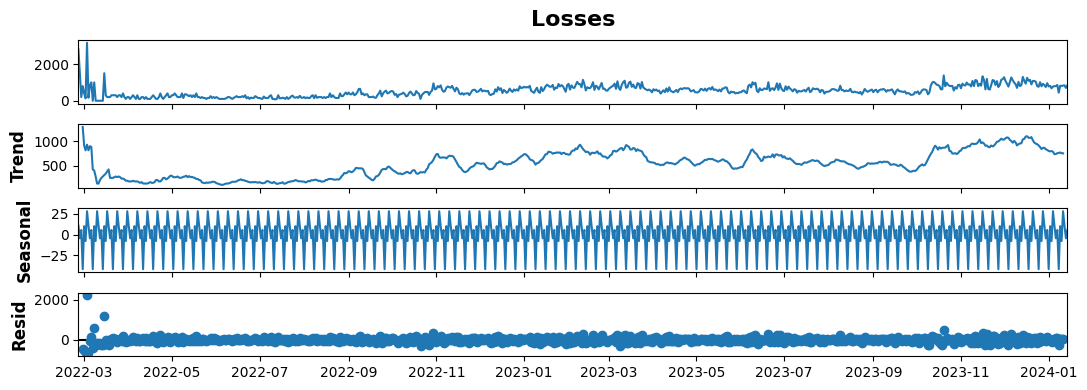

In [30]:
from statsmodels.tsa.seasonal import seasonal_decompose
seasonal_decompose(data['Losses'], model = 'additive').plot()
plt.show()